# Проект: Исследование стартапов

## Цели и задачи проекта
Необходимо подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.
Необходимо принять решения:
- по каким столбцам можно объединять данные из разных таблиц;
- можно ли доверять данным о сотрудниках стартапов и их образовании;
- что означают покупки за 0 или за 1 доллар;
- какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;
- как рассчитать и отобразить численные показатели и динамику.


Также необходимо в процессе работы выявить показатели и признаки, которые указывают на повышенную вероятность успешной сделки по покупке компании.

## Описание данных

В проекте будут использованы данные из пяти файлов.

Файл `company_and_rounds.csv`, расположенный по адресу`https://code.s3.yandex.net/datasets/company_and_rounds.csv`, содержит информацию о компаниях и раундах финансирования, в датасете имеются следующие столбцы:
- `company ID` — идентификатор компании;
- `name` — название компании;
- `category code` — категория области деятельности компании;
- `status` — статус компании;
- `founded at` — дата инвестирования;
- `closed at` — дата закрытия компании;
- `domain` — официальный сайт компании;
- `network username` — ник компании в сети;
- `country code` — код страны компании;
- `investment rounds` — число инвестиционных раундов;
- `funding rounds` — число раундов финансирования;
- `funding total` — сумма финансирования;
- `milestones` — вехи финансирования;
- `funding round id` — идентификатор этапа финансирования;
- `company id` — идентификатор компании;
- `funded at` — дата финансирования;
- `funding round type` — тип финансирования;
- `raised amount` — сумма финансирования;
- `pre money valuation` — предварительная денежная оценка;
- `participants` — число участников;
- `is first round` — является ли раунд первым;
- `is last round` — является раунд последним.

Файл `acquisition.csv`, расположенный по адресу`https://code.s3.yandex.net/datasets/acquisition.csv`, содержит информацию о покупках одними компаниями других компаний, в датасете имеются следующие столбцы:
- `id` — идентификатор покупки;
- `acquiring_company_id` — идентификатор покупающей компании;
- `acquired_company_id` — идентификатор покупаемой компании;
- `term_code` — варианты расчёта;
- `price_amount` — сумма сделки;
- `acquired_at` — дата сделки.

Файл `people.csv`, расположенный по адресу`https://code.s3.yandex.net/datasets/people.csv`, содержит информацию о сотрудниках, в датасете имеются следующие столбцы:
- `id` — идентификатор сотрудника;
- `first_name` — имя сотрудника;
- `last_name` — фамилия сотрудника;
- `company_id` — идентификатор компании;
- `network_username` — ник в социальных сетях.

Файл `education.csv`, расположенный по адресу`https://code.s3.yandex.net/datasets/education.csv`, содержит информацию об образовании сотрудника, в датасете имеются следующие столбцы:
- `id` — идентификатор записи об образовании;
- `person_id` — идентификатор работника;
- `instituition` — название учебного заведения;
- `graduated_at` — дата получения образования.

Файл `degrees.csv`, расположенный по адресу`https://code.s3.yandex.net/datasets/degrees.csv`, содержит информацию о типе образования сотрудника, в датасете имеются следующие столбцы:
- `id` — идентификатор записи;
- `object_id` — идентификатор сотрудника;
- `degree_type` — тип образования;
- `subject` — специальность.

<a class="anchor" id="5-bullet"></a>
### Содержимое проекта

<br>

1. [Знакомство с данными: загрузка и первичная предобработка](#1-bullet)<br>
2. [Предобработка данных](#2-bullet)<br>
3. [Исследовательский анализ данных](#3-bullet)<br>
4. [Категоризация данных](#4-bullet)

---


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузите все данные по проекту.
- Проверьте названия столбцов.
- Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [1]:
import warnings 

warnings.filterwarnings('ignore')

In [5]:
#pip install numpy==1.22.0 -q

In [4]:
#pip install matplotlib==3.7.3 -q

In [5]:
# Импортируем нудные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#сохраним повторяющийся путь в константу
PATH = "https://code.s3.yandex.net/datasets/"

In [7]:
#считаем файл company and rounds
company_df = pd.read_csv(PATH + 'company_and_rounds.csv')

In [8]:
#выведем общую информацию по датафрему
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [9]:
#настраиваем отображение всех столбцов
pd.set_option('display.max_columns', None)
company_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,funding rounds,funding total,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#выведем конец таблицы
company_df.tail()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,funding rounds,funding total,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
217769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0
217773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57063.0,284191.0,2013-12-04,venture,7000000.0,0.0,4.0,1.0,1.0


Датасет company_and_rounds содержит 22 столбца и 217774 строк, в которых представлена информация о различных компаниях и раундах их финансирования.

После первчиной оценки можно сделать выводы:
- Названия колонок заданы корректно и дают представление о хранящейся в них информации, но стоит привести названия столбцов к единому стилю 'snake_case'. Также, в названиях столбцов встречаются двойные пробелы 
- Во всех столбцах есть пропуски данных. В столбцах funding  round  id, company  id, funding  round  type, raised  amount, pre  money  valuation, participants, is  first  round, is  last  round заполнено только 52928 строк, а в столбце funded  at заполнено 52680 строки 
- Не во всех столбцах представлен оптимальный тип данных
- Столбцы founded  at, closed  at и funded  at стоит привести к типу datetime
- В датасете наблюдается повторяющийся столбец 'company ID' и 'company id' (1 и 15 столбец). В первом случае 217472 заполненных строк из 217774, а company id имеет 52928 строк. Видимо по этим столбцам объединялись два датасета в один
- Столбец 'funding total' - это сумма значений столбца 'raised amount', сгруппированного по названию/id компании 
- Столбцы 'is first round' и 'is last round' по всей видимости перепутаны исходя из первых трех строк датасета для компании Wetpaint, так как в раунде 2005 года значение в столбце 'is last round' равно 1, а в раунде 2008 года значение в столбце 'is last round' равно 0

In [6]:
#устанавливаем дополнительную библиотеку
#!pip install matplotlib_venn -q

In [12]:
#импортируем нужный модуль 
from matplotlib_venn import venn2

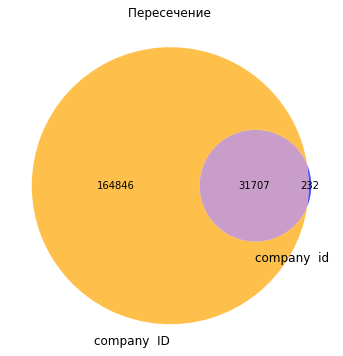

In [13]:
#создадим два множества названий компаний, предварительно убрав пустые значения, и оставив только уникальные
plt.figure(figsize=(12, 6))
first_id = set(company_df['company  ID'].dropna())
second_id = set(company_df['company  id'].dropna())
#строим диаграмму Венна
venn2([first_id, second_id], set_labels=('company  ID', 'company  id'), set_colors=("orange",
                             "blue"),alpha=0.7)

plt.title("Пересечение ")
plt.show() 

Вывод: множество id компаний из столбца company id почти понлностью содержится в множестве company ID, за исключением 232 компаний.

In [14]:
#изменим навание повторяющегося столбца
company_df.rename(columns={'company  id': 'company id2'}, inplace = True)

In [15]:
#объявим функцию для приведения названия столбцов к единому стилю
def snake_style(col):
    col = col.lower()
    if ' ' in col:
        col = col.replace('  ', '_').replace(' ','_')
    return col

In [16]:
#применим функцию к столбцам
company_df.columns = pd.Series(company_df.columns).apply(snake_style)
company_df.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id2', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [17]:
#считаем файл acquisition и присвоем его датафрейму
acquisition_df = pd.read_csv(PATH + 'acquisition.csv')

In [18]:
#выведем общую информацию по датафрему
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [19]:
#выведем первые строки датафрейма
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [20]:
#выведем последние строки датафрема
acquisition_df.tail()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
9402,10525,267859,285995,stock,222000000,2013-12-11
9403,10526,285493,286006,NaN,0,2013-12-09
9404,10527,223792,220208,NaN,26000000000,2007-07-03
9405,10528,227620,286176,cash,52400000,2013-12-12
9406,10529,53,92846,NaN,42600000,2013-12-12


Датасет acquisition.csv содержит 6 столбцов и 9407 строк, в которых представлена информация о покупках одними компаниями других компаний.

После первого взгляда на данные можно сделать выводы:
- Названия колонок заданы корректно и дают представление о хранящейся в них информации, названия колонок соответствуют стилю "snake case"
- В двух столбцах имеются пропуски в данных, это столбцы term_code (варианты расчёта) и acquired_at (дата сделки). И если в acquired_at число пропусков минимально (29 из 9407), то пропусков в term_code гораздо больше (7576 или более 80% от общего объема)
- Тип данных не везде выбран оптимальным
- Столбец acquired_at нужно привести к типу datetime64

In [21]:
#выгрузим файл people.csv 
people_df = pd.read_csv(PATH + 'people.csv')

In [22]:
#отобразим общую информацию по датафрейму
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [23]:
#отобразим первые строки датафрейма
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [24]:
#отобразим последние строки датафрейма
people_df.tail()

,id,first_name,last_name,company_id,network_username
226704,99999,Ramon,Peypoch,NaN,NaN
226705,174088,Dr. Ray,Woods,188200.0,network
226706,118386,Ricardo,Durand,143419.0,itechsocialnet
226707,175827,mahesh,kumar,NaN,socialnethubs
226708,178190,Alex,Smith,NaN,esocialnetlike


Датасет people.csv содержит 5 столбцов и 226709  строк, в которых представлена информация о сотрудниках компаний

Первичные выводы:
- Названия колонок заданы корректно и дают представление о хранящейся в них информации, названия колонок соответствуют стилю "snake case"
- В четырех столбцах имеются пропуски в данных, это столбцы first_name (имя сотрудника), last_name (фамилия сотрудника), company_id (идентификатор компании) и network_username (ник в социальных сетях). И если столбцах first_name и last_name число пропусков минимально (только 9 из 226709  и 4 пропуска соответственно), то пропусков в столбцах company_id и network_username пропусков гораздо больше (почти 85% в обоих случаях)

In [25]:
#считаем файл education
education_df = pd.read_csv(PATH + 'education.csv')

In [26]:
#выведем общую информацию по датафрейму
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [27]:
#выведем первые строки датафрейма
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [28]:
#выведем последние строки датафрейма
education_df.tail()

,id,person_id,instituition,graduated_at
109605,109606,268589,American Institute of Certtified Public Accoun...,NaN
109606,109607,268527,South China University of Technology,NaN
109607,109608,268527,Clarkson University,NaN
109608,109609,268528,Colorado State University,NaN
109609,109610,268528,University of San Diego School of Law,NaN


Датасет education.csv содержит 4 столбца и 109610 строк, в которых представлена информация об образовании сотрудника

Первичные выводы:
- Названия колонок заданы корректно и дают представление о хранящейся в них информации, названия колонок соответствуют стилю "snake case"
- В двух столбцах имеются пропуски в данных, это столбцы instituition (название учебного заведения) и graduated_at (дата получения образования). И если в instituition число пропусков минимально (55 из 109610), то пропусков в graduated_at гораздо больше (58054 или почти 50% от общего объема)
- Тип данных не везде выбран оптимальным
- Столбец graduated_at нужно привести к типу datetime64

In [29]:
#считаем файл degrees
degrees_df = pd.read_csv(PATH + 'degrees.csv')

In [30]:
#выведем общую информацию о датафрейме
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [31]:
#выведем первые строчки датафрейма 
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [32]:
#выведем последние строчки датафрейма
degrees_df.tail()

,id,object_id,degree_type,subject
109605,109606,p:268589,CPA,NaN
109606,109607,p:268527,MS & BS,Engineering
109607,109608,p:268527,PhD,Engineering
109608,109609,p:268528,B.S.,Electrical Engineering
109609,109610,p:268528,J.D.,NaN


Датасет degrees.csv содержит 4 столбца и 109610 строк, в которых представлена информация о типе образования сотрудника

Первичный анализ:
- Названия колонок заданы корректно и дают представление о хранящейся в них информации, названия колонок соответствуют стилю "snake case"
- В двух столбцах имеются пропуски в данных, это столбцы degree_type (тип образования) и subject (специальность). Число пропусков в данных столбцах составляет примерно 10% и 25% соотвественно
- Столбец object_id схож со столбцом person_id датафрейма education. По данным столбцам можно будет сделать объединение таблиц, но только после удаления префикса 'p:' в столбце object_id

### 1.2. Смена типов и анализ пропусков

- Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [33]:
#приведем столбцы датафрейма company_df с типом данных object к типу datetime64
company_df['founded_at'] = pd.to_datetime(company_df['founded_at'])
company_df['closed_at'] = pd.to_datetime(company_df['closed_at'])
company_df['funded_at'] = pd.to_datetime(company_df['funded_at'])
company_df.dtypes

company_id                    float64
name                           object
category_code                  object
status                         object
founded_at             datetime64[ns]
closed_at              datetime64[ns]
domain                         object
network_username               object
country_code                   object
investment_rounds             float64
funding_rounds                float64
funding_total                 float64
milestones                    float64
funding_round_id              float64
company_id2                   float64
funded_at              datetime64[ns]
funding_round_type             object
raised_amount                 float64
pre_money_valuation           float64
participants                  float64
is_first_round                float64
is_last_round                 float64
dtype: object

In [34]:
#заменим пропущенные значения столбца company_id на значения столбца company_id2
missing_num = company_df['company_id'].isna()
company_df.loc[missing_num, 'company_id'] = company_df.loc[missing_num, 'company_id2']
f"Количество пропусков в стоблце company_id: {company_df['company_id'].isna().sum()}"

'Количество пропусков в стоблце company_id: 0'

In [35]:
#выведем количество уникальных зачений в столбце company_id
company_df['company_id'].nunique()

196785

In [36]:
##выведем количество уникальных зачений в столбце name
company_df['name'].nunique()

196506

In [37]:
#проверяем наличие полных дубликатов в датафрейме company_df
company_df.duplicated().sum()

0

In [38]:
#приведем столбец acquired_at к формату datetime64
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'])

In [39]:
#проверим изменения
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [40]:
#выведем количество уникальных зачений в столбце id
acquisition_df['id'].nunique()

9407

In [41]:
#проверяем наличие полных дубликатов в датафрейме acquisition_df
acquisition_df.duplicated().sum()

0

In [42]:
#приведем столбец graduated_at к формату datetime64
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'])

In [43]:
#проверим изменения
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [44]:
#выведем количество уникальных зачений в столбце id
education_df['id'].nunique()

109610

In [45]:
#проверяем наличие полных дубликатов в датафрейме education_df
education_df.duplicated().sum()

0

In [46]:
#выведем количество уникальных зачений в столбце id
degrees_df['id'].nunique()

109610

In [47]:
#устанавливаем дополнительную библиотеку
!pip install missingno -q

In [48]:
#импортируем ее
import missingno as msno

<Axes: >

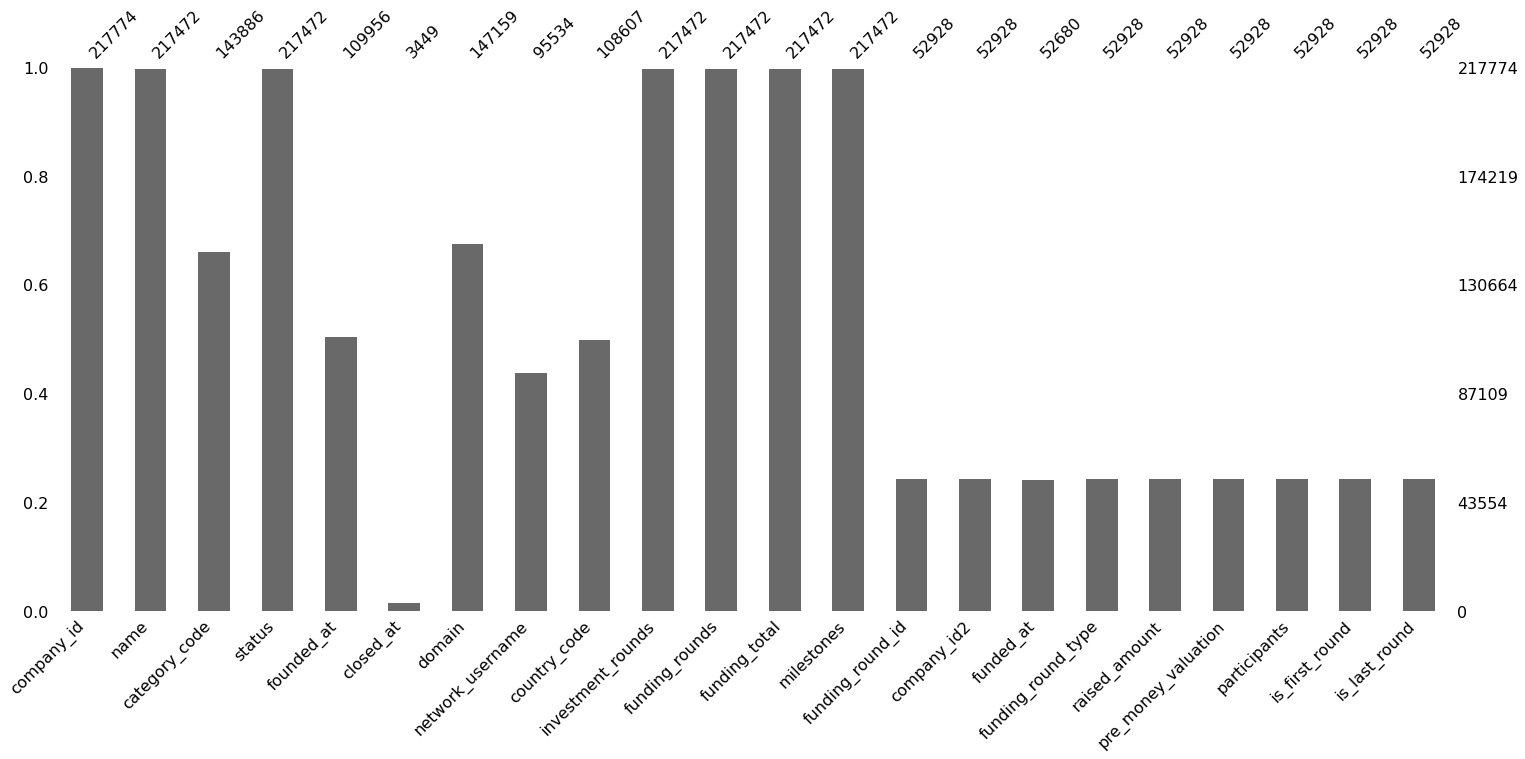

In [49]:
#строим столбчатую диаграмму с представлением пропущенных значений по столюцам датафрейма company_df
msno.bar(company_df)

<Axes: >

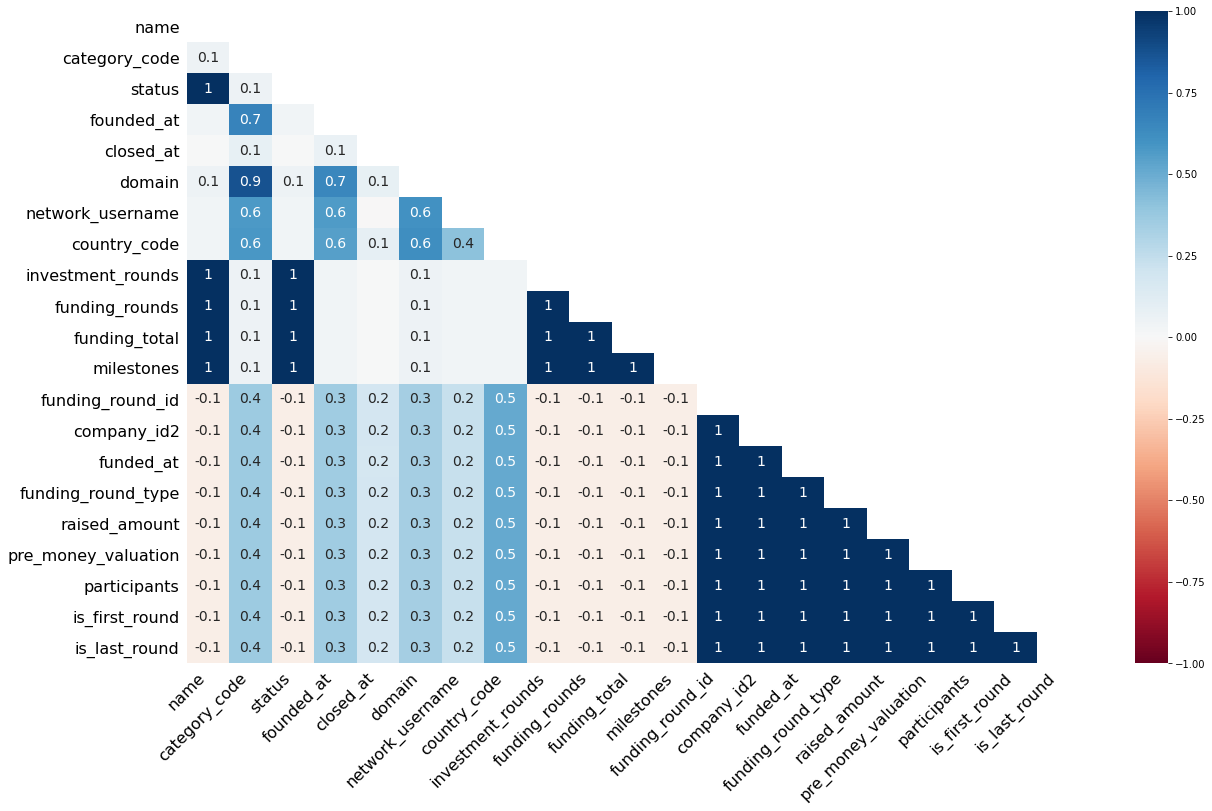

In [50]:
#строим тепловую карту корелляции пропусков в датафрейме company_df
msno.heatmap(company_df)

Вывод: По множеству значений 1 после столбца milestones, можно смело предположить, что датафрейм company_df состоит из двух, которые были соеденены по ключам company_id и company_id2. Также, наблюдается сильная зависимость пропущенных значений в парах category_code -- domain, category_code -- founded_at, founded_at -- domain.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [51]:
#создаем сводную таблицу 
pivot_table = (company_df.groupby(company_df['funded_at'].dt.year).agg(
        typical_raised_amount=pd.NamedAgg(column="raised_amount", aggfunc="median"),
        round_count=pd.NamedAgg(column="funding_round_id", aggfunc="count")).reset_index())

pivot_table['funded_at'] = pivot_table['funded_at'].astype(int)

filtered_pivot = pivot_table[pivot_table["round_count"] > 50].copy()

print(filtered_pivot.to_string(index=False))

 funded_at  typical_raised_amount  round_count
      1999              2000000.0           76
      2000              4200000.0          125
      2001              3000000.0           96
      2002              4200000.0          116
      2003              3000000.0          159
      2004              5000000.0          291
      2005              5500000.0         1633
      2006              5000000.0         2436
      2007              3973320.0         3279
      2008              3110000.0         3774
      2009              2000000.0         4151
      2010              1602500.0         6221
      2011              1200000.0         9204
      2012              1000000.0         9970
      2013              1200000.0        11072


In [52]:
filtered_pivot['typical_raised_amount'] = filtered_pivot['typical_raised_amount']/1000000

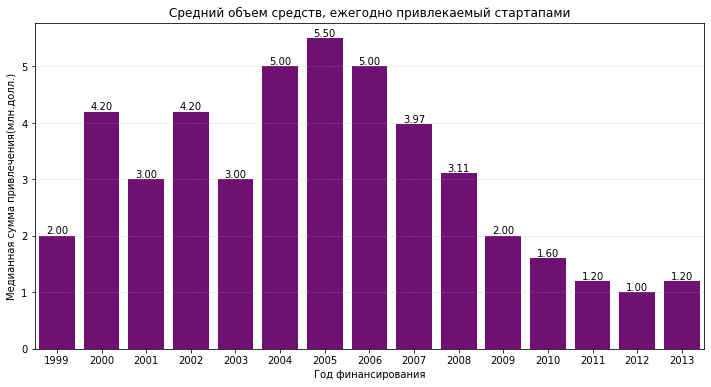

In [53]:
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='funded_at', y='typical_raised_amount', data=filtered_pivot, color = 'purple')

plt.title('Средний объем средств, ежегодно привлекаемый стартапами')
plt.xlabel('Год финансирования') 
plt.ylabel('Медианная сумма привлечения(млн.долл.)')

plt.xticks(rotation=0, ha='center') 
for bar in bars.containers:
    bars.bar_label(bar, fmt='%.2f') 
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

Вывод: типичный размер собранных в рамках одного раунда средств был максимален в 2005 году (средний объем, привлекаемый в рамках одного раунда составил 5 500 000 долларов США); в  2013 году наблюдается тенденция по уменьшению размера средств, выделяемых в рамках одного раунда (в 2009 - 2000 000, в 2010 - 1602 500, в 2011 - 1200 000, в 2012 - 1000 000, в 2013 - 1200 000), однако, наблюдается стабильный рост количества раундов в течение года (в 2009 - 4151 раундов, в 2010 - 6221 раундов, в 2011 - 9204 раундов, в 2012 - 9970 раундов, в 2013 - 11072 раундов)


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [54]:
#выведем общую информацию по people_df
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [55]:
#выведем общую информацию по education_df
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [56]:
#переименуем столбец id в people_df
people_df.rename(columns={'id': 'people_id'}, inplace=True)

In [57]:
#переименуем столбец id в education_df
education_df.rename(columns={'id': 'education_id'}, inplace=True)

In [58]:
#объединим два датафрейма левым джойном, так как в дф people_df больше строк
merged_people_ed_df = pd.merge(left=people_df, right=education_df, how='left', left_on='people_id', right_on='person_id')

In [59]:
#проверим присоединение 
merged_people_ed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   people_id         267694 non-null  int64         
 1   first_name        267689 non-null  object        
 2   last_name         267693 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   education_id      109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 20.4+ MB


**Присоединим еще датафрейм degrees_df по столбцу object_id, который содержит идентификатор сотрудников**

In [60]:
#переименуем столбец id в degrees_df
degrees_df.rename(columns={'id': 'degrees_id'}, inplace=True)
degrees_df

,degrees_id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"
...,...,...,...,...
109605,109606,p:268589,CPA,NaN
109606,109607,p:268527,MS & BS,Engineering
109607,109608,p:268527,PhD,Engineering
109608,109609,p:268528,B.S.,Electrical Engineering


In [61]:
#удалим начальные символы p: из столбца object_id
degrees_df['object_id'] = degrees_df['object_id'].str.replace('p:', '')
degrees_df

,degrees_id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"
...,...,...,...,...
109605,109606,268589,CPA,NaN
109606,109607,268527,MS & BS,Engineering
109607,109608,268527,PhD,Engineering
109608,109609,268528,B.S.,Electrical Engineering


In [62]:
#приведем значения к типу int
degrees_df['object_id'] = degrees_df['object_id'].astype(int)

In [63]:
#присоединим датафреймы
final_merged_df = pd.merge(left=merged_people_ed_df, right=degrees_df, how='left', left_on='people_id', right_on='object_id')

In [64]:
#выведем общую информацию по новому дф
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370836 entries, 0 to 370835
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   people_id         370836 non-null  int64         
 1   first_name        370831 non-null  object        
 2   last_name         370835 non-null  object        
 3   company_id        70869 non-null   float64       
 4   network_username  81529 non-null   object        
 5   education_id      212198 non-null  float64       
 6   person_id         212198 non-null  float64       
 7   instituition      212109 non-null  object        
 8   graduated_at      113991 non-null  datetime64[ns]
 9   degrees_id        212198 non-null  float64       
 10  object_id         212198 non-null  float64       
 11  degree_type       190722 non-null  object        
 12  subject           156477 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memor

In [65]:
#удалим повторы
cleaned_df = final_merged_df.drop_duplicates(subset=['people_id'])
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226708 entries, 0 to 370835
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   people_id         226708 non-null  int64         
 1   first_name        226703 non-null  object        
 2   last_name         226707 non-null  object        
 3   company_id        34614 non-null   float64       
 4   network_username  38867 non-null   object        
 5   education_id      68071 non-null   float64       
 6   person_id         68071 non-null   float64       
 7   instituition      68031 non-null   object        
 8   graduated_at      36387 non-null   datetime64[ns]
 9   degrees_id        68071 non-null   float64       
 10  object_id         68071 non-null   float64       
 11  degree_type       61401 non-null   object        
 12  subject           50808 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memor

In [66]:
#подсчитаем количество сотрудников в компаниях
employees_per_company = cleaned_df.groupby('company_id')['people_id'].nunique().sort_values()
employees_per_company

company_id
285163.0      1
285167.0      1
285196.0      1
285213.0      1
285221.0      1
           ... 
499.0        63
231067.0     72
1242.0      138
29.0        150
59.0        244
Name: people_id, Length: 22921, dtype: int64

In [67]:
#выведем минимальное количество сотрудников
employees_per_company.min()

1

In [68]:
#выведем максимальное количество сотрудников
employees_per_company.max()

244

In [69]:
#выведем среднее количество сотрудников
employees_per_company.mean()

1.5101435364949174

In [70]:
##выведем медианное количество сотрудников
employees_per_company.median()

1.0

**Так как среднее количество сотрудников равно 1.5, при учете, что максимальное равно 244 - рассмотрим выборку компаний, в которых будет до 10 сотрудников и разобьем их на категории**

In [71]:
employees_per_company = cleaned_df.groupby('company_id')['people_id'].nunique()

def categorize_employees(count):
    if count == 1:
        return '1 сотрудник'
    elif 2 <= count <= 5:
        return 'От 2 до 5 сотрудников'
    elif 6 <= count <= 10:
        return 'От 6 до 10 сотрудников'
    else:
        return 'Больше 10 сотрудников'

category_labels = employees_per_company.apply(categorize_employees)

companies_in_categories = category_labels.value_counts().reset_index()
companies_in_categories.columns = ['category', 'count']

companies_in_categories

,category,count
0,1 сотрудник,18116
1,От 2 до 5 сотрудников,4317
2,От 6 до 10 сотрудников,368
3,Больше 10 сотрудников,120


In [72]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226708 entries, 0 to 370835
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   people_id         226708 non-null  int64         
 1   first_name        226703 non-null  object        
 2   last_name         226707 non-null  object        
 3   company_id        34614 non-null   float64       
 4   network_username  38867 non-null   object        
 5   education_id      68071 non-null   float64       
 6   person_id         68071 non-null   float64       
 7   instituition      68031 non-null   object        
 8   graduated_at      36387 non-null   datetime64[ns]
 9   degrees_id        68071 non-null   float64       
 10  object_id         68071 non-null   float64       
 11  degree_type       61401 non-null   object        
 12  subject           50808 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memor

**Создадим столбец, который будет проверять наличие образования у сотрудников и выведем общее количество сотрудников с наличием информации об их образовании**

In [73]:
#столбцы, по которым смотрим наличие данных об образовании
education_columns = ['education_id', 'instituition', 'graduated_at', 'degrees_id', 'degree_type', 'subject']

#добавляем новый столбец education_check
cleaned_df.loc[:, 'education_check'] = np.where(
    ((cleaned_df[education_columns].notnull()).any(axis=1)) &
    (~((cleaned_df['graduated_at'].isna()) & (cleaned_df['graduated_at'] == pd.NaT))), 1, 0 )

#подсчитываем количество сотрудников с информацией об образовании
num_employees_with_education = cleaned_df['education_check'].sum()

f"Количество сотрудников с информацией об образовании: {num_employees_with_education}"

'Количество сотрудников с информацией об образовании: 68071'

In [74]:
#подсчитываем среднюю долю сотрудников без информации об образовании в каждой группе компаний
employees_per_company = cleaned_df.groupby('company_id')['people_id'].nunique()

def categorize_employees(count):
    if count == 1:
        return '1 сотрудник'
    elif 2 <= count <= 5:
        return 'От 2 до 5 сотрудников'
    elif 6 <= count <= 10:
        return 'От 6 до 10 сотрудников'
    else:
        return 'Больше 10 сотрудников'

cleaned_df['category_labels'] = employees_per_company.apply(categorize_employees)

result = cleaned_df.groupby('category_labels')['education_check'].mean().reset_index().sort_values(by = 'education_check')
result

,category_labels,education_check
2,От 2 до 5 сотрудников,0.259574
1,Больше 10 сотрудников,0.271605
0,1 сотрудник,0.288482
3,От 6 до 10 сотрудников,0.301205


Вывод: количество и доля людей без образования практически не зависит от размера компании

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

**Выведем информацию по датасетам, в которых встречаются нужные столбцы:**

In [75]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217774 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [76]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   people_id         226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [77]:
people_network = set(people_df['network_username'].dropna())
company_network = set(company_df['network_username'].dropna())
#выведем пересечение множеств
intersec_network = people_network & company_network
f'Количество совпадений в поле network_username: {len(intersec_network)}'

'Количество совпадений в поле network_username: 2199'

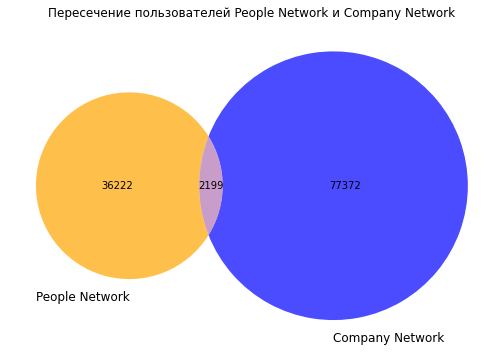

In [78]:
plt.figure(figsize=(12, 6))
venn2([people_network, company_network], set_labels=('People Network', 'Company Network'), set_colors=("orange",
                             "blue"),alpha=0.7)

plt.title("Пересечение пользователей People Network и Company Network")
plt.show()    

Вывод: В датафрейме company_df 95534 непустых строк, а в people_df 38867. Объединение датафреймов по столбцу network_username недопустимо из-за малого количества совпадений (2200).


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [79]:
#выделим таблицу компаний (без информации о раундах)
company_cols = [
    'company_id', 'name', 'category_code', 'status', 'founded_at',
    'closed_at', 'domain', 'network_username', 'country_code',
    'investment_rounds', 'funding_rounds', 'funding_total', 'milestones'
]
companies = company_df[company_cols].drop_duplicates(subset='company_id')

In [80]:
#выведем общую информацию по новому датафрейму
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196785 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196785 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [81]:
#выведем первые строки нового дф
companies.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0


In [82]:
#новая таблица по раундам финансирования
round_cols = [
    'company_id', 'funding_round_id', 'funded_at',
    'funding_round_type', 'raised_amount', 'pre_money_valuation',
    'participants', 'is_first_round', 'is_last_round'
]
rounds = company_df[round_cols].copy()

In [83]:
#выведем общую информацию по новому дф
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217774 non-null  float64       
 1   funding_round_id     52928 non-null   float64       
 2   funded_at            52680 non-null   datetime64[ns]
 3   funding_round_type   52928 non-null   object        
 4   raised_amount        52928 non-null   float64       
 5   pre_money_valuation  52928 non-null   float64       
 6   participants         52928 non-null   float64       
 7   is_first_round       52928 non-null   float64       
 8   is_last_round        52928 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 15.0+ MB


In [84]:
#выведем первые строки дф
rounds.head()

,company_id,funding_round_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,888.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,889.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,2312.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
#проверим - есть ли раунды без компании 
missing_nums = rounds[rounds['company_id'].isin(companies['company_id'])]
missing_nums

,company_id,funding_round_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,888.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,889.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,2312.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
217769,282847.0,56454.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,55477.0,56542.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,55477.0,56543.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,283492.0,56928.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0


Строк с company_id, которых нет в таблице компаний - нет

Вывод: в таблице компаний 196785 уникальных компаний и 196785 строк — это говорит об отсутствии дубликатов. Для всех раундов найдено соответствующее значение company_id в таблице компаний, связность данных не нарушена.


In [86]:
#объединим обратно два дф
company_rounds_merged = pd.merge(companies, rounds, on='company_id', how='left') 

In [87]:
company_rounds_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217774 entries, 0 to 217773
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217774 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [88]:
#сгруппируем данные по компаниям и выведем информацию по количеству раундов финансирования
rounds_per_company = company_rounds_merged.groupby('company_id')['funding_round_id'].count().sort_values()
rounds_per_company

company_id
209517.0     0
209502.0     0
209504.0     0
209505.0     0
209506.0     0
            ..
12352.0     13
26802.0     13
27486.0     14
169096.0    15
75429.0     15
Name: funding_round_id, Length: 196785, dtype: int64

In [89]:
#выведем среднее число раундов на компанию
rounds_per_company.mean()

0.26896358970449985

In [90]:
#выведем долю пропусков по каждому столбцу
missing_share = company_rounds_merged.isna().mean().sort_values(ascending=False)
missing_share

closed_at              0.984162
funded_at              0.758098
participants           0.756959
is_first_round         0.756959
raised_amount          0.756959
is_last_round          0.756959
funding_round_type     0.756959
funding_round_id       0.756959
pre_money_valuation    0.756959
network_username       0.561316
country_code           0.501286
founded_at             0.495091
category_code          0.339288
domain                 0.324258
milestones             0.001387
name                   0.001387
status                 0.001387
funding_rounds         0.001387
funding_total          0.001387
investment_rounds      0.001387
company_id             0.000000
dtype: float64

Поля с максимальным количеством пропусков:
closed_at: 98.8% пропусков — логично, многие компании не закрылись.

 - network_username, country_code, founded_at — пропусков примерно 50%

 - Основные числовые метрики (raised_amount, valuation, participants) — пропуски более чем в 75%

Данные по раундам не всегда заполнены, что важно учесть при дальнейшем анализе


## Шаг 3. Исследовательский анализ объединённых таблиц

> Приступите к шагу 3 после проверки ревьюера.

<big>Студентам нужно чётко сказать - проверять дальше или не проверять.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [91]:
#отберем копании по условиям
filt_companies = companies[(company_rounds_merged['funding_rounds'] > 0) |
    (company_rounds_merged['investment_rounds'] > 0) |
    (company_rounds_merged['status'] == 'acquired')
]

f'Число интересующих компаний: {filt_companies["company_id"].nunique()}'

'Число интересующих компаний: 40747'

**Вывод: получившееся число 40747 совпало с ожиданиями**


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [92]:
#убираем пропуски
funding_data = filt_companies['funding_total'].dropna()

In [93]:
#выведем основную статистику
funding_data.describe()

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

Выводы по статистическим данным:
 - **count** 40 747 - столько компаний с непустым funding_total
 - **mean** 10.1 млн - среднее, но оно сильно искажено выбросами
 - **std** 56.4 млн - очень большое стандартное отклонение — ещё одно подтверждение наличия выбросов
 - **min** 0 - есть компании без финансирования
 - **25% (Q1)**	0 - нижний квартиль — 25% компаний ничего не привлекли 
 - **50% (медиана)** 600 тыс - половина компаний привлекли менее 600 тыс
 - **75% (Q3)** 5.65 млн - три четверти привлекли менее этой суммы
 - **max** 5.7 млрд	 — верхняя граница в миллиарды

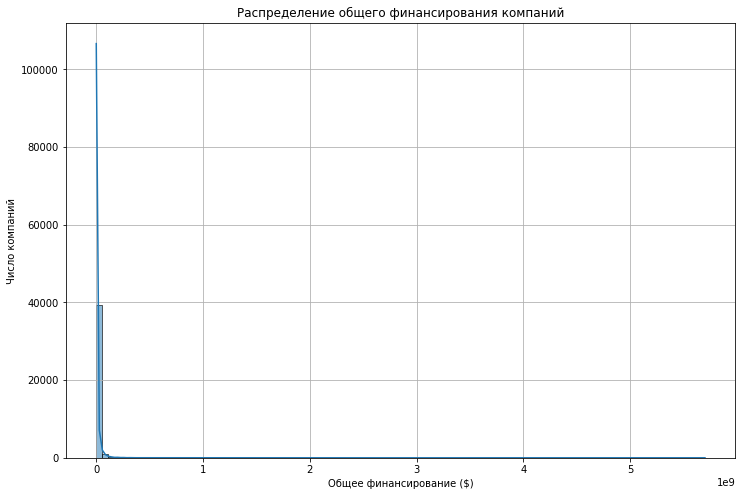

In [94]:
#построим гистограмму
plt.figure(figsize=(12, 8))
sns.histplot(funding_data, bins=100, kde=True)
plt.title('Распределение общего финансирования компаний')
plt.xlabel('Общее финансирование ($)')
plt.ylabel('Число компаний')
plt.grid(True)
plt.show()

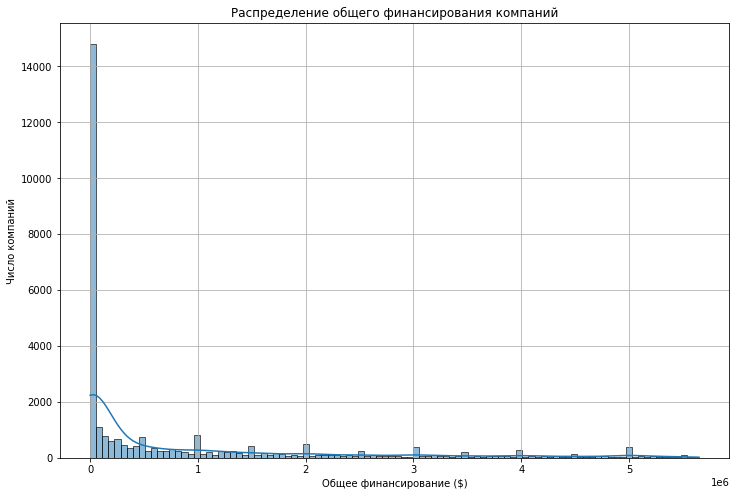

In [95]:
#построим гистограмму c границей по верхнему квартилю для наглядности
plt.figure(figsize=(12, 8))
sns.histplot(funding_data[(funding_data < 5650000)], bins=100, kde=True)
plt.title('Распределение общего финансирования компаний')
plt.xlabel('Общее финансирование ($)')
plt.ylabel('Число компаний')
plt.grid(True)
plt.show()

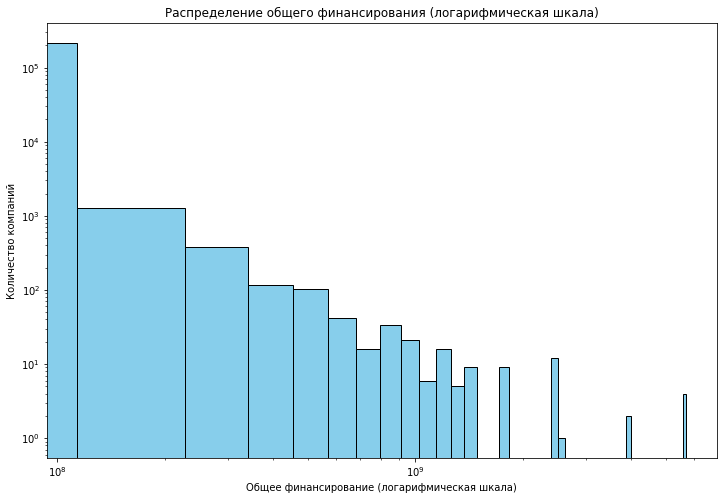

In [96]:
#построим график распределения в логарифмической маштабе из-за сильного разброса данных
plt.figure(figsize=(12, 8))
plt.hist(company_df['funding_total'], bins=50, color='skyblue', edgecolor='black', log=True)
plt.xscale('log')  # Логарифмическая шкала по оси X
plt.xlabel('Общее финансирование (логарифмическая шкала)')
plt.ylabel('Количество компаний')
plt.title('Распределение общего финансирования (логарифмическая шкала)')
plt.show()  

In [97]:
#рассчитаем границы выбросов по IQR
Q1 = funding_data.quantile(0.25)
Q3 = funding_data.quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR 

f'Верхняя граница выбросов: {upper_bound:,.0f} $'

'Верхняя граница выбросов: 14,126,625 $'

In [98]:
#определим процент выбросов
outliers = funding_data[funding_data > upper_bound]
f'Число выбросов: {len(outliers)} из {len(funding_data)} компаний или {len(outliers)/len(funding_data):.2%}'

'Число выбросов: 5858 из 40747 компаний или 14.38%'

Вывод по анализу выбросов funding_total

В таблице 40 747 компаний с ненулевым или ненулевым значением funding_total. Распределение показало сильную скошенность: медианное финансирование — 600 тыс долларов, но максимальное значение — 5.7 млрд

Среднее значение (21.1 млн долларов) сильно искажено редкими очень крупными сделками, поэтому для анализа лучше использовать медиану

Верхняя граница типичного финансирования: 14 126 625 долларов
Компаний с выбросами: 5858 из 40 747 (14.38%)


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [105]:
#повторно отберем интересующие компании, заменяя пропуски на нулевые значения
#selected_companies = company_rounds_merged[
  #  (company_rounds_merged['funding_rounds'].fillna(0) > 0) |
  #  (company_rounds_merged['investment_rounds'].fillna(0) > 0) |
   # (company_rounds_merged['status'] == 'acquired')]
#f'Число интересующих компаний: {selected_companies.shape[0]}'

In [106]:
#отберем компании с признаками проданы за 0$ или 1$ и ненулевым финансированием
#cheap_acquisitions = selected_companies[
    #(selected_companies['raised_amount'].isin([0, 1])) &
   # (selected_companies['funding_total'] > 0)]
#f'Число компаний, проданных за 0$ или 1$, при этом с финансированием > 0: {cheap_acquisitions.shape[0]}'

In [99]:
#повторно отберем интересующие компании, заменяя пропуски на нулевые значения
filt_companies = companies[(companies['funding_rounds'].fillna(0) > 0) |
    (companies['investment_rounds'].fillna(0) > 0) |
    (companies['status'] == 'acquired')
]

In [100]:
#объединим с датасетом acquisition
df_merge = pd.merge(left = filt_companies, right = acquisition_df, left_on='company_id', right_on = 'acquiring_company_id', how='left') 

In [101]:
#сделаем фильрацию данных
cheap_acquisitions = df_merge[(df_merge.status == "acquired") & (df_merge.price_amount < 2) & (df_merge.funding_total != 0)]
f'Число компаний, проданных за 0$ или 1$, при этом с финансированием > 0: {cheap_acquisitions.shape[0]}'

'Число компаний, проданных за 0$ или 1$, при этом с финансированием > 0: 304'

In [102]:
upper_boundary = 14126625
percentile = np.round(
    (filt_companies['funding_total'] < upper_boundary).mean() * 100, 2)
f"Верхняя граница выбросов соответствует примерно {percentile}-му процентилю"

'Верхняя граница выбросов соответствует примерно 85.62-му процентилю'

Вывод:
Для оценки типичного объёма финансирования были рассчитаны границы выбросов. Верхняя граница оказалась на уровне 14.1 млн долларов, что соответствует 86-му процентилю распределения
Также были выявлены 304 компаний, которые получили финансирование, но затем были проданы всего за 0 или 1 доллар — потенциально это неудачные или формальные сделки


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [103]:
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [104]:
#объединим компании с таблицей поглощений
selected_with_acquisition = filt_companies.merge(acquisition_df, left_on='company_id', 
                                                     right_on='acquiring_company_id', how='left')

In [105]:
clean_df = selected_with_acquisition.drop_duplicates()

In [106]:
selected_with_acquisition[['company_id', 'name', 'price_amount']].head()

,company_id,name,price_amount
0,1.0,Wetpaint,NaN
1,10.0,Flektor,NaN
2,100.0,There,NaN
3,1001.0,FriendFeed,NaN
4,10014.0,Mobclix,0.0


In [107]:
#оставим только те компании, у которых цена поглощения указана и больше 0
acquired_companies = selected_with_acquisition[
    selected_with_acquisition['price_amount'].notna() &
    (selected_with_acquisition['price_amount'] > 0)]

In [108]:
acquired_companies[['company_id', 'name', 'category_code', 'price_amount']].head()

,company_id,name,category_code,price_amount
31,10069.0,PlayPhone,games_video,51500000.0
42,10085.0,Compaq,hardware,307000000.0
58,10119.0,WPP,public_relations,649000000.0
90,10166.0,Acxiom,software,3600000.0
131,10222.0,Hitachi,public_relations,120000000.0


In [109]:
#группировка по категориям
category_price_stats = acquired_companies.groupby('category_code')['price_amount'].agg(['count', 'median', 'std']).sort_values('median', ascending=False)

#отфильтруем категории с достаточным числом наблюдений
category_price_stats_filtered = category_price_stats[category_price_stats['count'] >= 10]

#посмотрим топ-10 категорий по медиане цены
category_price_stats_filtered.sort_values('median', ascending=False).head(10)

,count,median,std
category_code,,,
biotech,120,334000000.0,2.411252e+09
cleantech,13,265000000.0,1.040202e+09
network_hosting,48,181500000.0,1.422482e+09
mobile,51,178000000.0,8.178944e+09
hardware,86,162500000.0,1.206753e+09
other,39,150000000.0,2.957766e+09
enterprise,84,97500000.0,1.663672e+09
security,43,95000000.0,5.452944e+08
news,20,84500000.0,8.068373e+08


In [110]:
#выведем топ-10 категорий по разбросу цен
category_price_stats_filtered.sort_values('std', ascending=False).head(10)

,count,median,std
category_code,,,
mobile,51,178000000.0,8.178944e+09
finance,12,26300000.0,7.476402e+09
other,39,150000000.0,2.957766e+09
biotech,120,334000000.0,2.411252e+09
search,55,60000000.0,1.748839e+09
enterprise,84,97500000.0,1.663672e+09
web,221,80000000.0,1.485598e+09
network_hosting,48,181500000.0,1.422482e+09
games_video,43,65000000.0,1.336028e+09


Обоснование выбора метрик: медиана устойчива к выбросам и отражает «типичную» цену,а стандартное отклонение показывает разброс — насколько непредсказуемой может быть цена покупки.



### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [111]:
#фильтруем строки, оставляя только положительные значения в funding_rounds
filtered_df = companies[companies['funding_rounds'] > 0]
companies = filtered_df.copy()
filtered_df['funding_rounds'].describe()

count    31707.000000
mean         1.659760
std          1.201666
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: funding_rounds, dtype: float64

In [112]:
#посчитаем среднее количество раундов по статусам
avg_rounds_by_status = (companies.groupby('status')['funding_rounds'].mean().sort_values(ascending=False))
avg_rounds_by_status

status
ipo          2.526531
acquired     1.896645
operating    1.642359
closed       1.383437
Name: funding_rounds, dtype: float64

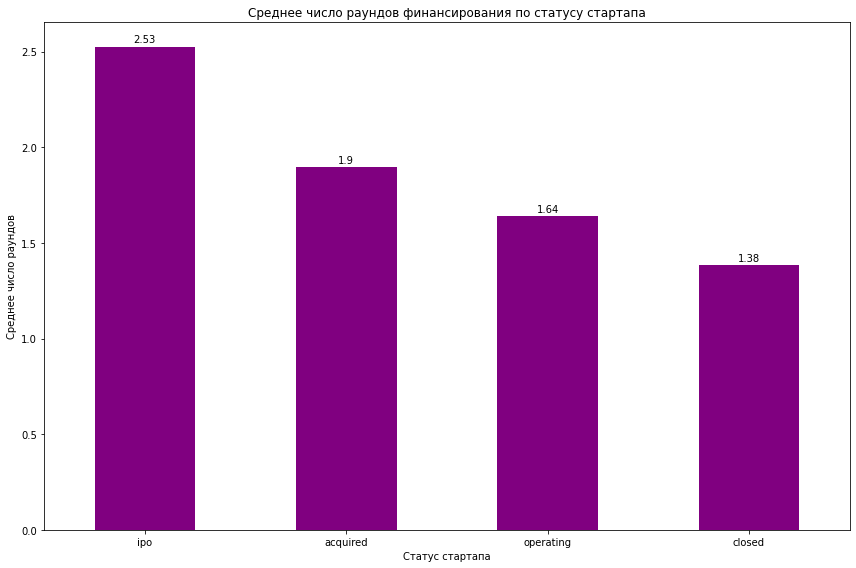

In [113]:
#построим график
plt.figure(figsize=(12,8))
avg_rounds_by_status.plot(kind='bar', color='purple')
plt.title('Среднее число раундов финансирования по статусу стартапа')
plt.ylabel('Среднее число раундов')
plt.xlabel('Статус стартапа')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='', alpha=0.7)
plt.tight_layout()

for i, v in enumerate(avg_rounds_by_status.values):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=10)

plt.show()

Вывод: комании, вышедшие на IPO в среднем проходили почти 2.5 раунда; те, кого купили - почти2 раунда; обычные дйствующие компании - 1.64 раунда; а закрытые - 1.38 раундов.


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

В этом проекте мы изучили данные о стартапах: объемы привлеченных инвестиций, количество раундов финансирования и их итоги — выход на IPO, поглощение другими компаниями или закрытие.

Данные были собраны из нескольких источников, очищены от дубликатов и пропущенных значений, после чего мы провели поиск закономерностей, которые могут быть полезны инвесторам.

Ключевые выводы
1. Какие стартапы привлекают инвесторов?
Мы выделили компании, которые получили инвестиции (даже минимальные) или были приобретены. Таких оказалось свыше 40 тысяч.
Чтобы исключить искажение данных, мы убрали выбросы — стартапы с аномально высокой оценкой. Они составили около 14% от общего числа.

2. Странные сделки: покупки за 0 или 1 доллар
Обнаружилось 304 случаев, когда стартапы приобретались за символическую сумму, несмотря на ранее привлеченные инвестиции. Возможные причины — неудачные проекты, внутренние сделки или юридические нюансы.

3. В каких сферах стартапы продаются дороже?
Наибольшие суммы приходятся на:

Biotech, Cleantech и Network Hosting

При этом в Mobile, Finance и Biotech наблюдается сильный разброс цен, что говорит о высокой волатильности и рисках в этих нишах.

4. Сколько раундов финансирования проходят стартапы перед выходом?
Среднее количество раундов в зависимости от исхода:

IPO примерно 2.5 раунда

Поглощение примерно 1.9 раунда

Действующие компании меньше 1.64 раунда

Закрывшиеся стартапы примерно 1.38 раунда

Это показывает, что выход на IPO требует большего финансирования, а неудачные стартапы часто проходят больше раундов, чем успешно проданные.